# Data Cleaning and pre-processing 

## Importing some module and loading data

In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# loading the image using cv2.imread

img = cv2.imread('./test_images/sharapova1.jpg')
img.shape    #(columns, rows, rgb channel)

(555, 700, 3)

## Displaying the colored and gray images

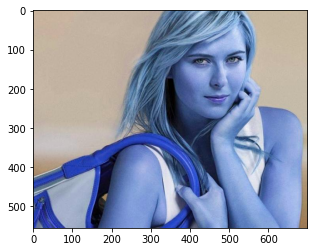

In [3]:
# Plotting the color image

plt.imshow(img)

In [4]:
#Changing the color image to a gray image

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

In [5]:
gray

array([[175, 175, 175, ..., 176, 175, 174],
       [175, 175, 175, ..., 177, 175, 174],
       [175, 175, 175, ..., 177, 176, 174],
       ...,
       [ 84,  87,  88, ..., 113, 113, 113],
       [ 88,  89,  90, ..., 113, 113, 113],
       [ 93,  91,  91, ..., 112, 112, 112]], dtype=uint8)

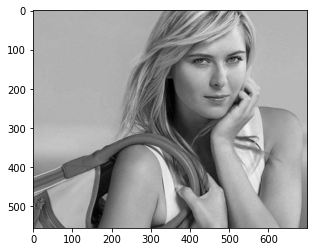

In [6]:
# Plotting the gray image

plt.imshow(gray, cmap='gray')

## Face detection and eyes detection

In [7]:
# Here we are loading two classier from cv2.data.harrcascade for face and eyes detection
# https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html 

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces   # It will retuen an 2d array [[x, y, width, height]]

array([[352,  38, 233, 233]], dtype=int32)

In [8]:
# Storing the values
(x, y, w, h) = faces[0]
x, y, w, h

(352, 38, 233, 233)

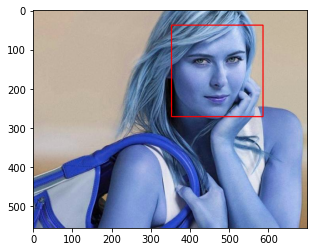

In [9]:
# Detecting face

face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255,0,0), 2)
plt.imshow(face_img)

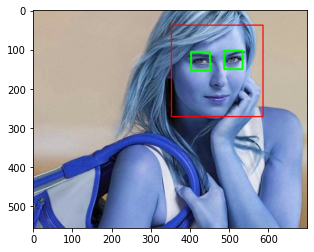

In [10]:
# Firstly we are iterating through all the faces and detecting it
# Secondly iterating all the faces and detecting eyes

cv2.destroyAllWindows()
#Faces Detection
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    # Updating the values
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]  # Only the face region (roi = region of interest) 
    # Eyes Detection
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),3)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

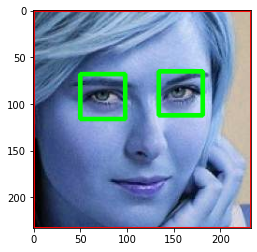

In [11]:
roi_color = face_img[y:y+h, x:x+w]
plt.imshow(roi_color)

In [12]:
# We will use it in the weblete section

cropped_img = np.array(roi_color)
cropped_img.shape

(233, 233, 3)

## Creating a function to crop the face only

In [13]:

# def get_cropped_image_if_2_eyes(image_path):
#     img = cv2.imread(image_path)
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     faces = face_cascade.detectMultiScale(gray, 1.3, 5)
#     for (x,y,w,h) in faces:
#         roi_gray = gray[y:y+h, x:x+w]                                           # Error(8 hrs)
#         roi_color = img[y:y+h, x:x+w]
#         eyes = eye_cascade.detectMultiScale(roi_gray)
#         if len(eyes) >= 2:
#             return roi_color

        
# Creating a function to crop the faces
        
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if(img is not None):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                return roi_color   
    else:
        exit(1)

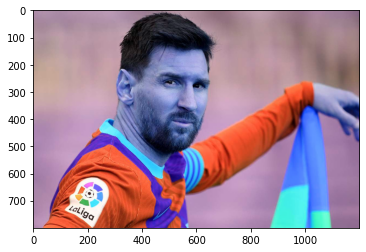

In [14]:
original_image = cv2.imread('./dataset/lionel_messi/Barcelona contract expired....jpg')
plt.imshow(original_image)

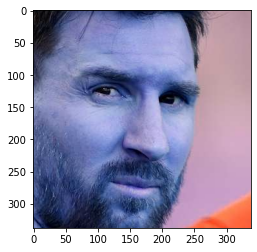

In [15]:
cropped_image = get_cropped_image_if_2_eyes('./dataset/lionel_messi/Barcelona contract expired....jpg')
plt.imshow(cropped_image)

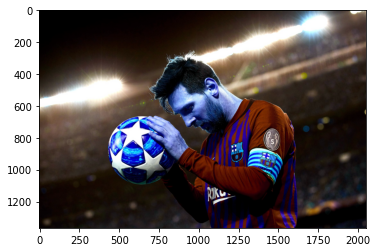

In [16]:
org_image_obstructed = cv2.imread('./dataset/lionel_messi/A Genius in Full Bloom_ Lionel Messi....jpg')
plt.imshow(org_image_obstructed)

In [17]:
cropped_image = get_cropped_image_if_2_eyes('./dataset/lionel_messi/A Genius in Full Bloom_ Lionel Messi....jpg')
cropped_image

## Automatic crop img and save it

In [18]:
# Initializing the path variable

path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [19]:
# Storing all the sub directories within the img_dirs


import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [20]:
img_dirs

['./dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

In [21]:
# As Crop folder does not exist so we gonna create it
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)   # If the folder exsits it will delete it
os.mkdir(path_to_cr_data)     # Then it will again create it

In [22]:
#Function to crop it and store to required folder

cropped_image_dirs = []
celebrity_file_names_dict = {}    # We will use it in weblete section

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]   # Splitting the path in to path+name and storing the name only
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []      # We will use latter on  (Initializing the keys as celebrity name)
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)   #(Initializing the values as path of each img)
            count += 1

lionel_messi
Generating cropped images in folder:  ./dataset/cropped/lionel_messi


# Weblete Transformation (Featuring Extracting)
(In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc)

In [ ]:

import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

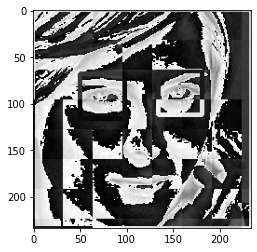

In [ ]:
# We have previously stored the cropped_img

im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [ ]:
    celebrity_file_names_dict

{'lionel_messi': ['./dataset/cropped/lionel_messi/lionel_messi1.png',
  './dataset/cropped/lionel_messi/lionel_messi2.png',
  './dataset/cropped/lionel_messi/lionel_messi3.png',
  './dataset/cropped/lionel_messi/lionel_messi4.png',
  './dataset/cropped/lionel_messi/lionel_messi5.png',
  './dataset/cropped/lionel_messi/lionel_messi6.png',
  './dataset/cropped/lionel_messi/lionel_messi7.png',
  './dataset/cropped/lionel_messi/lionel_messi8.png',
  './dataset/cropped/lionel_messi/lionel_messi9.png',
  './dataset/cropped/lionel_messi/lionel_messi10.png',
  './dataset/cropped/lionel_messi/lionel_messi11.png',
  './dataset/cropped/lionel_messi/lionel_messi12.png',
  './dataset/cropped/lionel_messi/lionel_messi13.png',
  './dataset/cropped/lionel_messi/lionel_messi14.png',
  './dataset/cropped/lionel_messi/lionel_messi15.png',
  './dataset/cropped/lionel_messi/lionel_messi16.png',
  './dataset/cropped/lionel_messi/lionel_messi17.png',
  './dataset/cropped/lionel_messi/lionel_messi18.png',
  '

## Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

In [ ]:
# As my target dataset elements must be numerical rather than catagorical that's why we are replacing each name
# by a certain number (Each name correspond with a particular value)

class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lionel_messi': 0,
 'maira_sarapova': 1,
 'Rroger_Federar': 2,
 'serena_willams': 3,
 'virat_kohli': 4}

In [ ]:
# Now we are crearting X and y data set

x, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])

In [ ]:
len(x)

316

In [ ]:
# Converting the numbers as float 

x = np.array(x).reshape(len(x),4096).astype(float)
x.shape

(316, 4096)

# Data cleaning process is done. Now we are ready to train our model

We will use SVM with rbf kernel tuned with heuristic finetuning

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)     # Splitting the dataset

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])       # Creating pipeline
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.759493670886076

In [ ]:
print(classification_report(y_test, pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         9
           1       0.75      0.71      0.73        17
           2       0.77      0.87      0.82        23
           3       0.70      0.83      0.76        23
           4       0.86      0.86      0.86         7

    accuracy                           0.76        79
   macro avg       0.82      0.72      0.73        79
weighted avg       0.78      0.76      0.75        79



## Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}  

In [ ]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.764007,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.671277,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.781028,{'logisticregression__C': 1}


In [ ]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [ ]:
best_estimators['svm'].score(x_test,y_test)

0.810126582278481

In [ ]:
best_estimators['random_forest'].score(x_test,y_test)

0.5189873417721519

In [ ]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.7974683544303798

In [ ]:
best_clf = best_estimators['svm']

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(x_test))
cm

array([[ 6,  0,  0,  1,  2],
       [ 0, 13,  1,  3,  0],
       [ 0,  1, 21,  1,  0],
       [ 0,  2,  3, 18,  0],
       [ 1,  0,  0,  0,  6]], dtype=int64)

Text(69.0, 0.5, 'Truth')

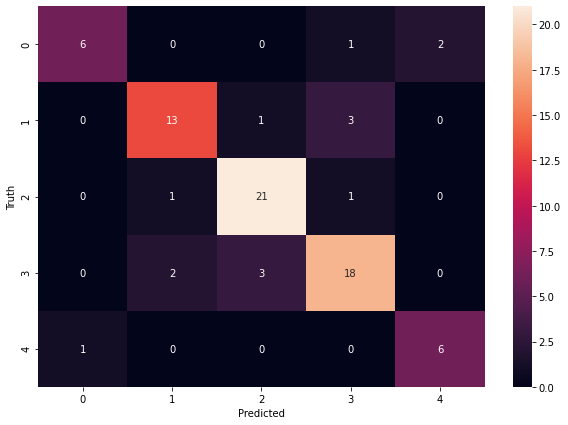

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
class_dict

{'lionel_messi': 0,
 'maira_sarapova': 1,
 'Rroger_Federar': 2,
 'serena_willams': 3,
 'virat_kohli': 4}

## Save the trained model

In [ ]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

## Save class dictionary

In [ ]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))